In [84]:
import numpy as np 
import pandas as pd 

In [85]:
data=pd.read_csv("C:/Users/suraj/Desktop/ExcelR/Assignment 11 text mining/Elon_musk.csv" , encoding=("ISO-8859-1"), low_memory=False)

In [86]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [87]:
data1=data.drop("Unnamed: 0" , axis=1)

In [88]:
data1.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [89]:
data2=data1.rename({"Text": "Tweets"}, axis=1)
data2.head()

,Tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [90]:
data2.shape

(1999, 1)

In [91]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [92]:
import re
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [93]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [94]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [95]:
from textblob import TextBlob
from wordcloud import WordCloud

In [120]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text)
    text = re.sub(r'#' , '' , text)
    text = re.sub(r'RT[\s]+' , '' , text)
    text = re.sub(r'https?:\/\/S+' , '' , text)
    text = re.sub(r'https://t.co/9WFKMYu2oj+' , '' , text)
    
    
    return text

data2['Tweets']=data2['Tweets'].apply(cleanTxt)

data2

,Tweets,Subjectivity,Polarity,Analysis
0,Im an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge is underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,Samwise Gamgee,0.000000,0.000000,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [121]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [122]:
data2['Subjectivity']=data2["Tweets"].apply(getSubjectivity)
data2['Polarity']= data2["Tweets"].apply(getPolarity)

In [123]:
data2.head()

,Tweets,Subjectivity,Polarity,Analysis
0,Im an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge is underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive


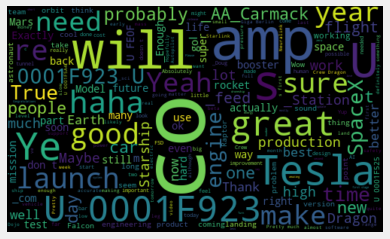

In [124]:
allwords=' '.join([twts for twts in data2["Tweets"]])
wordcloud= WordCloud(width=500, height=300 , random_state=20, max_font_size=119).generate(allwords)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('OFF')
plt.show()

In [125]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
data2['Analysis']=data2['Polarity'].apply(getAnalysis)

data2

,Tweets,Subjectivity,Polarity,Analysis
0,Im an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge is underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,Samwise Gamgee,0.000000,0.000000,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [126]:
m=1
sortedDF = data2.sort_values(by=['Polarity'])
for i in range(0 , sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Positive'):
        print(str(m) + ') '+sortedDF['Tweets'][i])
        print()
        m=m+1

1)   Great interview!

2)  Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!

3) Happy New Year of the Ox! .co/9WFKMYu2oj

4) _   Haha thanks :)

5) The most entertaining outcome is the most likely

6)   Its getting real

7)  He definitely has issues, but the sentencing seems a bit high

8)  Thanks for fixing

9) This is true power haha .co/Fc9uhQSd7O

10) : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission! .co/3pWt

11)   _ Once we can predict cash flow reasonably well, Starlink will IPO

12)   Does seem a bit high

13)   Wow

14) _7_42  So cute <U+0001F495>

15)  Extremely misleading image, as doesnt reflect true time cost to people or rain &amp; pain

16)  Its the most fun crypto!

17)  True

18)   Not that easy. This is two decades of intense work. Have to look at old notes, emails, texts.

19)  Have you read ? Its great!!

20) _ Sure

21) The great thing about restaurants

In [127]:
m=1
sortedDF = data2.sort_values(by=['Polarity'] , ascending='False')
for i in range(0 , sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Negative'):
        print(str(m) + ') '+sortedDF['Tweets'][i])
        print()
        m=m+1

1)  Im an alien

2)  Your app sucks

3)  _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don .co/9Z8Ac6skqx

4)  _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or .co/7J1c92hdjl

5)  Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.

6)  Doge appears to be inflationary, but is not meaningfully so (fixed  of coins per unit time), whereas .co/4UH4rARC6T

7)   It was foolish of us not to start 3 engines &amp; immediately shut down 1, as 2 are needed to land

8)  We were too dumb

9) This was a tough one .co/beY7peFpCj

10) : This mission enables access for everyday people who dream of going to space

11) _feed Earth is small &amp; we are smaller still .co/gTOhcLGJ82

12)  _Ryan A little

13) _7TeslaNews  Yeah, probably in a few months

14)  After you drive without using a PRND stalk/stick for a few days, it gets very annoying t

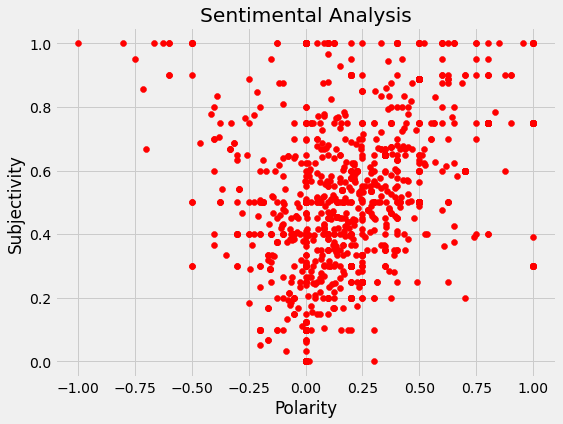

In [128]:
plt.figure(figsize=(8,6))
for i in range(0, data2.shape[0]):
    plt.scatter(data2['Polarity'][i], data2['Subjectivity'][i], color='red')
    
plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [129]:
# positive tweets
ptweets=data2[data2.Analysis == 'Positive']
ptweets = ptweets['Tweets']

ptweets.shape[0]/data2.shape[0]*100

44.22211105552776

In [130]:
# negative tweets
ntweets=data2[data2.Analysis == 'Negative']
ntweets = ntweets['Tweets']

ntweets.shape[0]/data2.shape[0]*100

10.955477738869435

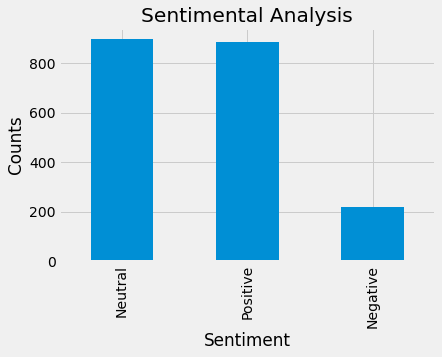

In [131]:
data2['Analysis'].value_counts()

plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data2['Analysis'].value_counts().plot(kind='bar')
plt.show()